In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)


In [2]:
df=pd.read_csv('D:/python/project/7102/group/group/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv')

In [3]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df_train=df[(df['condition']=='Birth Control')| (df['condition']=='Depression')| (df['condition']=='Pain')|(df['condition']=='Anxiety')]

In [5]:
df_train.shape

(49906, 7)

In [6]:
X=df_train.drop(['drugName','rating','date','usefulCount'],axis=1)

In [7]:
X.condition.value_counts()

condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Name: count, dtype: int64

In [8]:
X.head()

,uniqueID,condition,review
2,92703,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000,Birth Control,"""This is my first time using any form of birth..."
9,48928,Birth Control,"""I had been on the pill for many years. When m..."
11,75612,Depression,"""I have taken anti-depressants for years, with..."
14,98494,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [9]:
X_birth= X[X['condition']== 'Birth Control']
X_dep= X[X['condition']== 'Depression']
X_pain= X[X['condition']== 'Pain']
X_anx= X[X['condition']== 'Anxiety']

In [10]:
X['review'] = X['review'].str.replace('"', '', regex=False)

In [11]:
X.head()

,uniqueID,condition,review
2,92703,Birth Control,"I used to take another oral contraceptive, whi..."
3,138000,Birth Control,This is my first time using any form of birth ...
9,48928,Birth Control,I had been on the pill for many years. When my...
11,75612,Depression,"I have taken anti-depressants for years, with ..."
14,98494,Birth Control,Started Nexplanon 2 months ago because I have ...


In [12]:
from nltk.corpus import stopwords

stop=stopwords.words('english')

In [13]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter= PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [15]:
from bs4 import BeautifulSoup
import re

In [16]:
X.head()

,uniqueID,condition,review
2,92703,Birth Control,"I used to take another oral contraceptive, whi..."
3,138000,Birth Control,This is my first time using any form of birth ...
9,48928,Birth Control,I had been on the pill for many years. When my...
11,75612,Depression,"I have taken anti-depressants for years, with ..."
14,98494,Birth Control,Started Nexplanon 2 months ago because I have ...


In [17]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
def review_words_stemming (raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stop]
    stemmed_words = [stemmer.stem(w) for w in meaningful_words]

    return ' '.join(stemmed_words)


In [18]:
X['clean_review']=X['review'].apply(review_words_stemming)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14572\3153129685.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [19]:
X.head()

,uniqueID,condition,review,clean_review
2,92703,Birth Control,"I used to take another oral contraceptive, whi...",use take anoth oral contracept pill cycl happi...
3,138000,Birth Control,This is my first time using any form of birth ...,first time use form birth control glad went pa...
9,48928,Birth Control,I had been on the pill for many years. When my...,pill mani year doctor chang rx chateal effect ...
11,75612,Depression,"I have taken anti-depressants for years, with ...",taken anti depress year improv most moder seve...
14,98494,Birth Control,Started Nexplanon 2 months ago because I have ...,start nexplanon month ago minim amount contrac...


In [20]:
X_feat=X['clean_review']
y=X['condition']

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

#  Bag of words

In [22]:
count_vectorizer=CountVectorizer(stop_words= 'english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' if cm.dtype == int else '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Bag of words + Naive Baiyes

0.9321779202564616


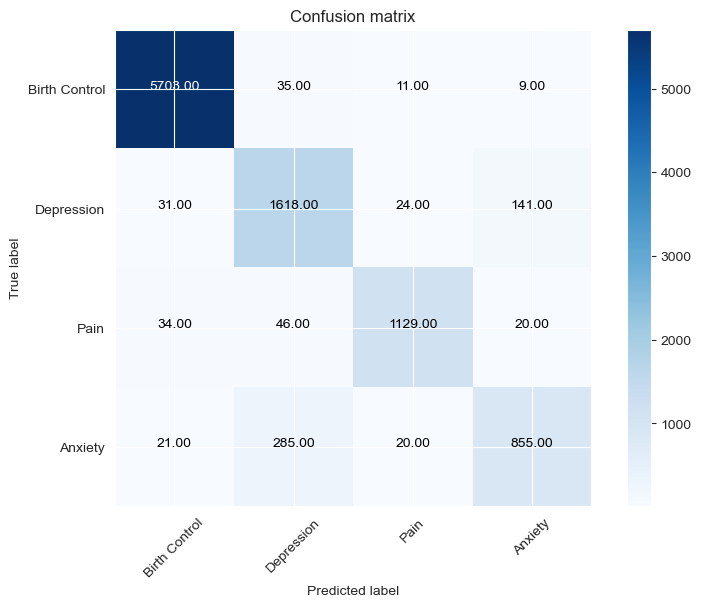

In [24]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)

score=metrics.accuracy_score(y_test,pred)
print(score)

cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

# TF-IDF(Trigrams) + Passive Aggressive

0.9628330995792427


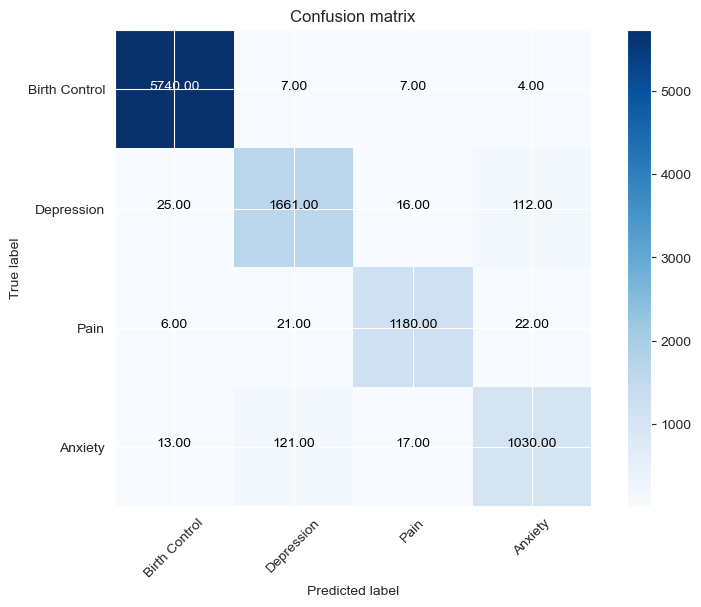

In [26]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,3))
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train,y_train)
pred=pass_tf.predict(tfidf_test)
score=metrics.accuracy_score(y_test,pred)
print(score)


cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [27]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    feature_names = vectorizer.get_feature_names_out()
    labelid = list(classifier.classes_).index(classlabel)
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    for coef, feat in topn:
        print(f"Class: {classlabel}, Feature: {feat}, Coefficient: {coef}")

    return topn

In [28]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Birth Control')

Class: Birth Control, Feature: month, Coefficient: 5.6524331538168
Class: Birth Control, Feature: pregnant, Coefficient: 6.157415513109475
Class: Birth Control, Feature: bleed, Coefficient: 6.509576432627266
Class: Birth Control, Feature: birth control, Coefficient: 6.678756553693618
Class: Birth Control, Feature: birth, Coefficient: 6.999154499421624
Class: Birth Control, Feature: acn, Coefficient: 7.525333598459159
Class: Birth Control, Feature: pill, Coefficient: 7.868234726127953
Class: Birth Control, Feature: insert, Coefficient: 8.119973974135565
Class: Birth Control, Feature: cramp, Coefficient: 8.335408188081049
Class: Birth Control, Feature: period, Coefficient: 11.738420361905003


[(5.6524331538168, 'month'),
 (6.157415513109475, 'pregnant'),
 (6.509576432627266, 'bleed'),
 (6.678756553693618, 'birth control'),
 (6.999154499421624, 'birth'),
 (7.525333598459159, 'acn'),
 (7.868234726127953, 'pill'),
 (8.119973974135565, 'insert'),
 (8.335408188081049, 'cramp'),
 (11.738420361905003, 'period')]

In [29]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Depression')

Class: Depression, Feature: pristiq, Coefficient: 3.949945959394017
Class: Depression, Feature: viibryd, Coefficient: 4.790309147174327
Class: Depression, Feature: celexa, Coefficient: 4.879962761260835
Class: Depression, Feature: abilifi, Coefficient: 4.885157159414067
Class: Depression, Feature: brintellix, Coefficient: 4.893840924292783
Class: Depression, Feature: prozac, Coefficient: 5.087891136141492
Class: Depression, Feature: zoloft, Coefficient: 5.510997178170327
Class: Depression, Feature: wellbutrin, Coefficient: 5.652074901096836
Class: Depression, Feature: antidepress, Coefficient: 5.692600601541958
Class: Depression, Feature: depress, Coefficient: 10.915922618188782


[(3.949945959394017, 'pristiq'),
 (4.790309147174327, 'viibryd'),
 (4.879962761260835, 'celexa'),
 (4.885157159414067, 'abilifi'),
 (4.893840924292783, 'brintellix'),
 (5.087891136141492, 'prozac'),
 (5.510997178170327, 'zoloft'),
 (5.652074901096836, 'wellbutrin'),
 (5.692600601541958, 'antidepress'),
 (10.915922618188782, 'depress')]

In [30]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Pain')

Class: Pain, Feature: vicodin, Coefficient: 3.844088372459097
Class: Pain, Feature: opana, Coefficient: 3.970123575791518
Class: Pain, Feature: disc, Coefficient: 3.9834728428474167
Class: Pain, Feature: nucynta, Coefficient: 4.027033256490824
Class: Pain, Feature: norco, Coefficient: 4.310893096029563
Class: Pain, Feature: oxycontin, Coefficient: 4.319099401994218
Class: Pain, Feature: relief, Coefficient: 4.565905046610013
Class: Pain, Feature: percocet, Coefficient: 5.059828868213427
Class: Pain, Feature: surgeri, Coefficient: 5.3915381531846345
Class: Pain, Feature: pain, Coefficient: 11.943431534243325


[(3.844088372459097, 'vicodin'),
 (3.970123575791518, 'opana'),
 (3.9834728428474167, 'disc'),
 (4.027033256490824, 'nucynta'),
 (4.310893096029563, 'norco'),
 (4.319099401994218, 'oxycontin'),
 (4.565905046610013, 'relief'),
 (5.059828868213427, 'percocet'),
 (5.3915381531846345, 'surgeri'),
 (11.943431534243325, 'pain')]

In [31]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'Anxiety')

Class: Anxiety, Feature: lorazepam, Coefficient: 3.190199779452095
Class: Anxiety, Feature: medicin work great, Coefficient: 3.322834410758502
Class: Anxiety, Feature: panic, Coefficient: 3.528747893310726
Class: Anxiety, Feature: klonopin, Coefficient: 4.201980626204492
Class: Anxiety, Feature: valium, Coefficient: 4.402824319373138
Class: Anxiety, Feature: xanax, Coefficient: 4.429125637691589
Class: Anxiety, Feature: calm, Coefficient: 4.490123550616656
Class: Anxiety, Feature: ativan, Coefficient: 5.15437601828213
Class: Anxiety, Feature: buspar, Coefficient: 6.831454816886167
Class: Anxiety, Feature: anxieti, Coefficient: 13.602679314718877


[(3.190199779452095, 'lorazepam'),
 (3.322834410758502, 'medicin work great'),
 (3.528747893310726, 'panic'),
 (4.201980626204492, 'klonopin'),
 (4.402824319373138, 'valium'),
 (4.429125637691589, 'xanax'),
 (4.490123550616656, 'calm'),
 (5.15437601828213, 'ativan'),
 (6.831454816886167, 'buspar'),
 (13.602679314718877, 'anxieti')]